## **vLLM : Fast LLM Serving**

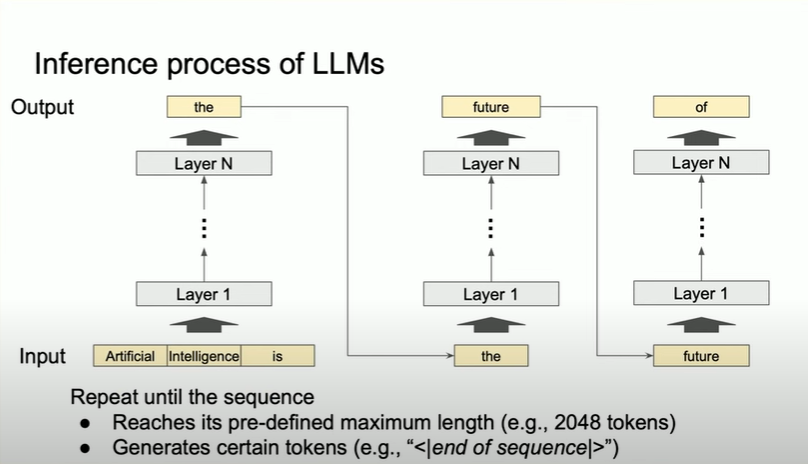

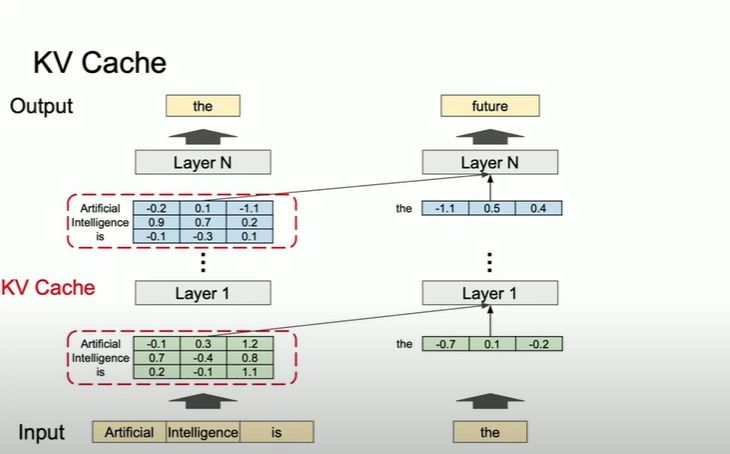

![Screenshot 2023-12-19 190135.png](<attachment:Screenshot 2023-12-19 190135.png>)
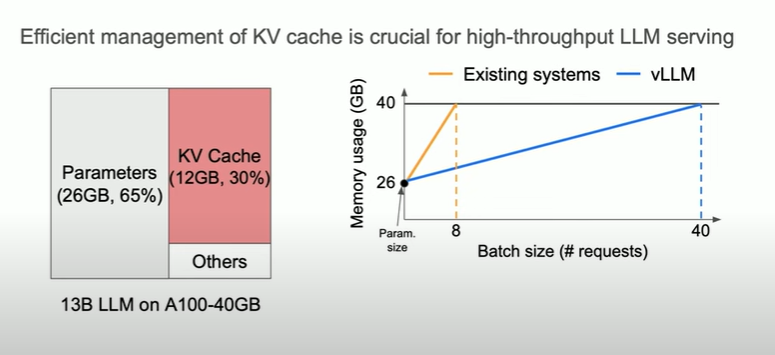

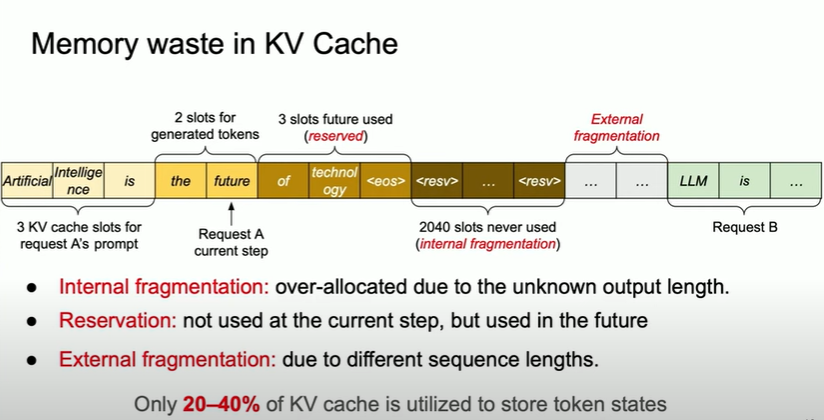

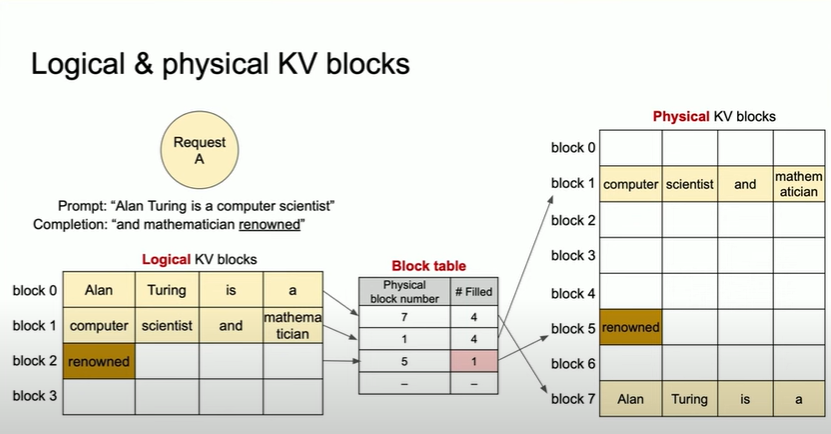

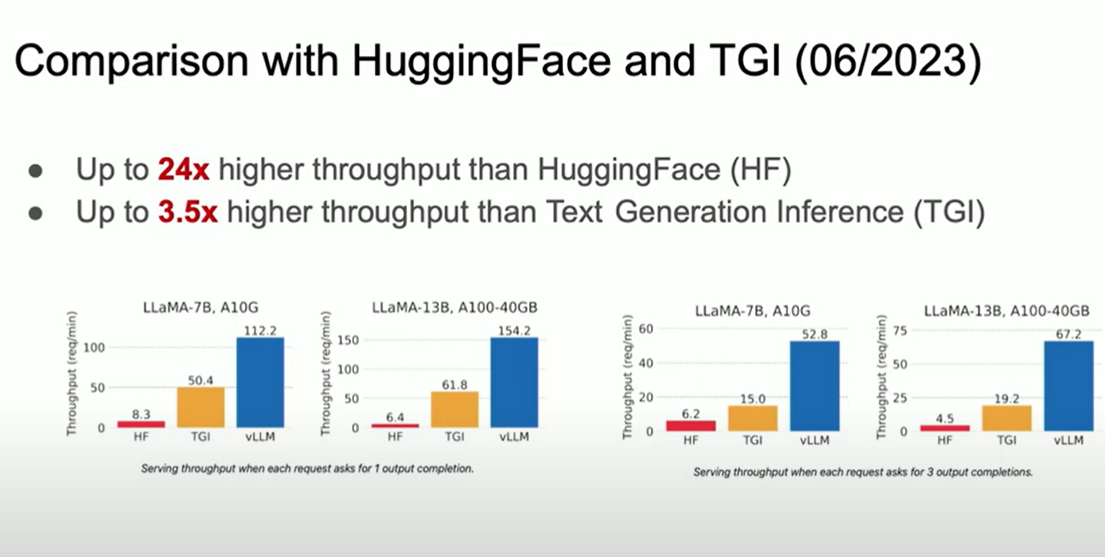

## **Trying vLLM with Mistral-7B-Instruct Model**

**VM Specs:** 
- Running on a g4dn.xlarge EC2 Instance (1x16GB Tesla T4 GPU, 4x16GB vCPU)

In [1]:
from vllm import LLM, SamplingParams

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-19 12:24:14,008	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-19 12:24:14,435	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
llm = LLM(model="TheBloke/Mistral-7B-Instruct-v0.1-AWQ", quantization='awq', dtype='half', gpu_memory_utilization=.90, max_model_len= 8192)

WARNING 12-19 12:24:16 config.py:467] Casting torch.bfloat16 to torch.float16.
WARNING 12-19 12:24:16 config.py:179] awq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
INFO 12-19 12:24:16 llm_engine.py:73] Initializing an LLM engine with config: model='TheBloke/Mistral-7B-Instruct-v0.1-AWQ', tokenizer='TheBloke/Mistral-7B-Instruct-v0.1-AWQ', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=8192, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=awq, enforce_eager=False, seed=0)


INFO 12-19 12:24:48 llm_engine.py:223] # GPU blocks: 1530, # CPU blocks: 2048
INFO 12-19 12:24:49 model_runner.py:394] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-19 12:25:02 model_runner.py:437] Graph capturing finished in 12 secs.


In [3]:
import textwrap

system_prompt = """A chat between a curious user and an artificial intelligence assistant. 
The assistant gives helpful, detailed, and polite answers to the user's questions.
"""
addon_prompt = ""

def get_prompt(human_prompt):
    prompt_template=f"{system_prompt}\n{addon_prompt} \n\nUSER: {human_prompt} \nASSISTANT: "
    return prompt_template

def cut_off_text(text, prompt):
    cutoff_phrase = prompt
    index = text.find(cutoff_phrase)
    if index != -1:
        return text[:index]
    else:
        return text

def remove_substring(string, substring):
    return string.replace(substring, "")

def generate(text):
    prompt = get_prompt(text)
    sampling_params = SamplingParams(max_tokens=512,temperature=0.7,top_p =0.95,top_k =  50,)
    outputs = llm.generate([prompt], sampling_params)
    return outputs

def parse_text(output):
        generated_text = output[0].outputs[0].text
        wrapped_text = textwrap.fill(generated_text, width=100)
        print(wrapped_text +'\n\n')

In [4]:
%%time
prompt = 'What is the capital of England?'
generated_text = generate(prompt)
parse_text(generated_text)

Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

 The capital of England is London. It's a vibrant city with a rich history and culture. Would you
like to know more about London or its landmarks?


CPU times: user 1.11 s, sys: 19.1 ms, total: 1.13 s
Wall time: 1.14 s


In [5]:
%%time
prompt = 'Write an email to Sam Altman giving reasons to open source GPT-4'
generated_text = generate(prompt)
parse_text(generated_text)

Processed prompts: 100%|██████████| 1/1 [00:10<00:00, 10.21s/it]

  Dear Sam Altman,  I am writing to you to express my strong interest in GPT-4 and to suggest that
you consider making it open source. I believe that by doing so, you can contribute to the
advancement of artificial intelligence research and development, while also making it more
accessible to a wider range of users.  Here are a few reasons why I believe GPT-4 should be open
source:  1. Increased collaboration: By making GPT-4 open source, you can encourage collaboration
between researchers, developers, and other experts in the field. This can lead to new ideas,
innovations, and breakthroughs in AI. 2. Wider access: Open source software is often more widely
used and accessible than proprietary software. By making GPT-4 open source, you can make it
available to a larger community of researchers and developers, regardless of their financial
resources. 3. Improved transparency: Open source software is often more transparent than proprietary
software. By making GPT-4 open source, you can pr

In [6]:

%%time
prompt = 'Answer the following question by reasoning step by step. The cafeteria had 23 apples. If they used 20 for lunch, and bought 6 more, how many apple do they have?'
generated_text = generate(prompt)
parse_text(generated_text)

Processed prompts: 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]

  1. The cafeteria had 23 apples initially.  2. They used 20 apples for lunch, leaving 3 apples
unused.  3. Then, they bought 6 more apples, adding those to the remaining 3 apples.  4. So, the
total number of apples in the cafeteria is now 3 (initially unused) + 6 (bought) = 9 apples.
Hence, the cafeteria has 9 apples.


CPU times: user 3.49 s, sys: 1.12 ms, total: 3.49 s
Wall time: 3.49 s


## **Trying vLLM with Langchain**

In [1]:
from langchain.llms import VLLM

In [2]:
llm = VLLM(
    model="facebook/opt-125m",
    trust_remote_code=True,  # mandatory for hf models
    max_new_tokens=128,
    top_k=10,
    top_p=0.95,
    temperature=0.8,
)

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-19 12:55:31,899	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-19 12:55:32,417	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 12-19 12:55:32 llm_engine.py:73] Initializing an LLM engine with config: model='facebook/opt-125m', tokenizer='facebook/opt-125m', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, enforce_eager=False, seed=0)
INFO 12-19 12:55:37 llm_engine.py:223] # GPU blocks: 22114, # CPU blocks: 7281
INFO 12-19 12:55:40 model_runner.py:394] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-19 12:55:44 model_runner.py:437] Graph capturing finished in 5 secs.


In [3]:
%%time
print(llm("What is the capital of France ?"))

Processed prompts: 100%|██████████| 1/1 [00:00<00:00, 17.25it/s]


Paris
What is the capital of France ?
CPU times: user 92.6 ms, sys: 6.14 ms, total: 98.7 ms
Wall time: 97.9 ms


In [2]:
%%time

llm = VLLM(
    model="TheBloke/Mistral-7B-Instruct-v0.1-AWQ", 
    quantization='awq',
    trust_remote_code=True,
    dtype = 'half',
    temperature=0.8,
    gpu_memory_utilization=.95, 
    max_model_len= 2000,
    max_split_size_mb = 500,
)

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-19 12:48:05,072	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-19 12:48:05,418	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


WARNING 12-19 12:48:05 config.py:467] Casting torch.bfloat16 to torch.float16.
WARNING 12-19 12:48:05 config.py:179] awq quantization is not fully optimized yet. The speed can be slower than non-quantized models.
INFO 12-19 12:48:05 llm_engine.py:73] Initializing an LLM engine with config: model='TheBloke/Mistral-7B-Instruct-v0.1-AWQ', tokenizer='TheBloke/Mistral-7B-Instruct-v0.1-AWQ', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.float16, max_seq_len=32768, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=awq, enforce_eager=False, seed=0)


OutOfMemoryError: CUDA out of memory. Tried to allocate 14.00 GiB. GPU 0 has a total capacty of 14.58 GiB of which 9.43 GiB is free. Including non-PyTorch memory, this process has 5.14 GiB memory in use. Of the allocated memory 4.38 GiB is allocated by PyTorch, and 512.74 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
print(llm("'What is the capital of England?'"))